In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (5, 7)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})
np.set_printoptions(suppress=True)

### Dataset

|   Features   |  Description    |
| ---- | ---- |
| loan_amnt | "The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value." |
| term | The number of payments on the loan. Values are in months and can be either 36 or 60. |
| int_rate | Interest Rate on the loan |
| installment | The monthly payment owed by the borrower if the loan originates. |
| grade | LC assigned loan grade |
| sub_grade | LC assigned loan subgrade |
| emp_title | The job title supplied by the Borrower when applying for the loan.* |
| emp_length | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.  |
| home_ownership | "The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER" |
| annual_inc | The self-reported annual income provided by the borrower during registration. |
| verification_status | "Indicates if income was verified by LC, not verified, or if the income source was verified" |
| issue_d | The month which the loan was funded |
| loan_status | Current status of the loan |
| purpose | A category provided by the borrower for the loan request.  |
| title | The loan title provided by the borrower |
| zip_code | The first 3 numbers of the zip code provided by the borrower in the loan application. |
| addr_state | The state provided by the borrower in the loan application |
| dti | "A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income." |
| earliest_cr_line | The month the borrower's earliest reported credit line was opened |
| open_acc | The number of open credit lines in the borrower's credit file. |
| pub_rec | Number of derogatory public records |
| revol_bal | Total credit revolving balance |
| revol_util | "Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit." |
| total_acc | The total number of credit lines currently in the borrower's credit file |
| initial_list_status | "The initial listing status of the loan. Possible values are – W, F" |
| application_type | Indicates whether the loan is an individual application or a joint application with two co-borrowers |
| mort_acc | Number of mortgage accounts. |
| pub_rec_bankruptcies | Number of public record bankruptcies |

In [2]:

df = pd.read_csv('dataset/lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [3]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### Summary

Here we get a lot of insight into the dataset

- There are 26 features and 1 target column (binary)
- Few columns have missing values

In [5]:
df["term"] = df["term"].apply(lambda term: int(term[:3]))
df["loan_repaid"] = df["loan_status"].map({"Fully Paid":1, "Charged Off":0})

In [6]:
sub_df = pd.DataFrame()
sub_df['missing_values'] = df.isnull().sum()
sub_df['percentage_of_missing_values'] = df.isnull().sum()/len(df.index) * 100
sub_df['unique_count_per_col'] = df.nunique()
sub_df['correlation_with_target'] = df.corr()['loan_repaid']
sub_df

,missing_values,percentage_of_missing_values,unique_count_per_col,correlation_with_target
loan_amnt,0,0.000000,1397,-0.059836
term,0,0.000000,2,-0.173246
int_rate,0,0.000000,566,-0.247758
installment,0,0.000000,55706,-0.041082
grade,0,0.000000,7,NaN
sub_grade,0,0.000000,35,NaN
emp_title,22927,5.789208,173105,NaN
emp_length,18301,4.621115,11,NaN
home_ownership,0,0.000000,6,NaN
annual_inc,0,0.000000,27197,0.053432


**Distribution of target features**

There appears to be class imbalance with `Fully Paid` class containing 80.3% of dataset and `Charged Off` class containing 19.6% of dataset

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64
Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64


<AxesSubplot:xlabel='loan_status', ylabel='count'>

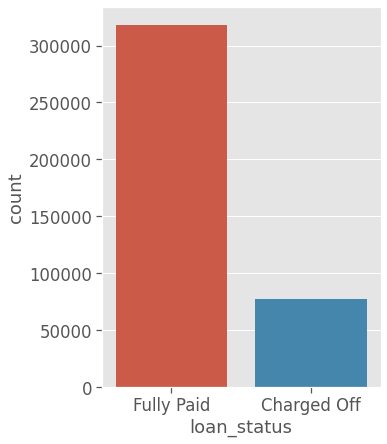

In [7]:
print(df['loan_status'].value_counts())
print(df['loan_status'].value_counts(normalize=True))
sns.countplot(data=df, x="loan_status")

<AxesSubplot:>

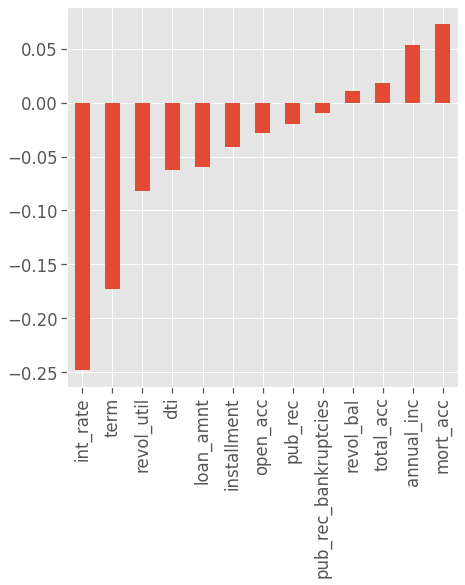

In [8]:
plt.figure(figsize=(7,7))
df.corr()["loan_repaid"].sort_values().drop("loan_repaid").plot(kind="bar")

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

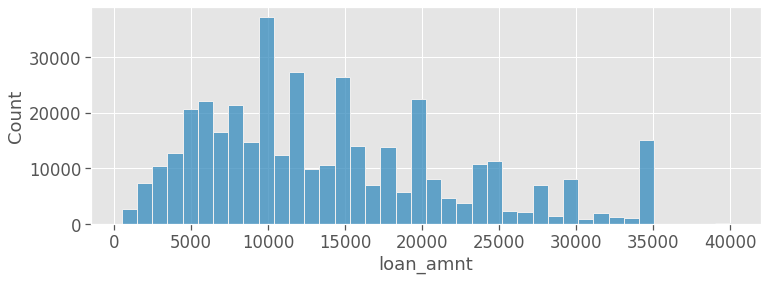

In [9]:
plt.figure(figsize=(12,4))
sns.histplot(x="loan_amnt", data=df, bins=40)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

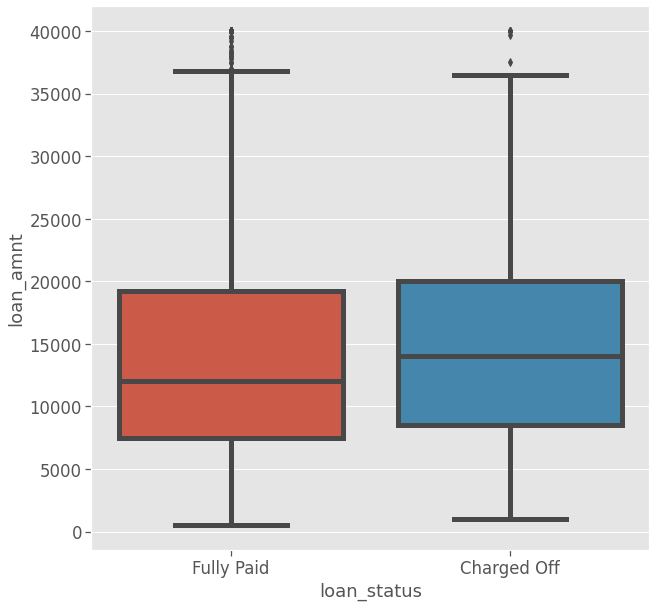

In [10]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="loan_status", y="loan_amnt", data=df)

<AxesSubplot:xlabel='mort_acc', ylabel='Count'>

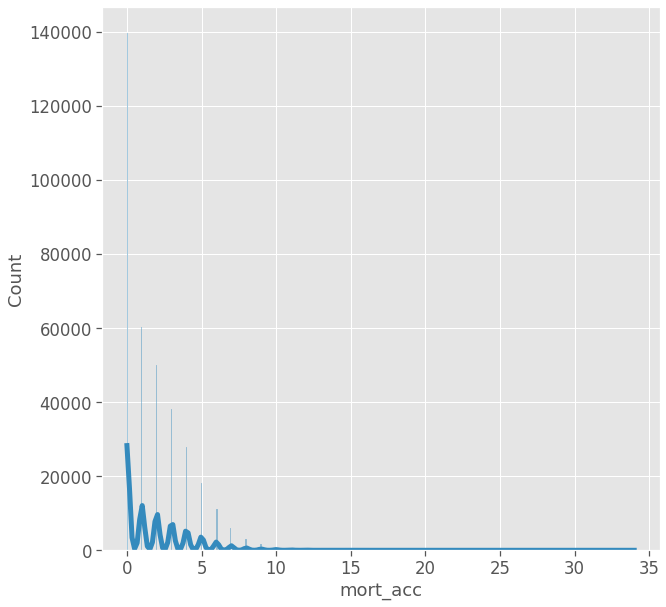

In [11]:
plt.figure(figsize=(10, 10))
sns.histplot(x="mort_acc", data=df, kde=True)